AirBnb Data Analysis  - Aswin Y A

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as px
import re
from sklearn.preprocessing import MinMaxScaler


In [130]:
#reading the csv file obtained from Airbnb
listings = pd.read_csv('listings.csv')

In [131]:
#Converting the data into a pandas DataFrame
listings_df = pd.DataFrame(listings)

In [132]:
#Finding the number of records and columns in the dataset
listings_df.shape

(43566, 18)

In [133]:
#Show the datatypes of the dataset
listings_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [134]:
#view how the records are stored and viewed
listings_df.head(5)

id                                               name  host_id  \
0   5121  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356   
1   2595  Rental unit in New York · ★4.68 · Studio · 1 b...     2845   
2  14991  Rental unit in New York · ★4.93 · 1 bedroom · ...    59023   
3   5136  Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...     7378   
4  59709  Rental unit in New York · ★4.77 · 2 bedrooms ·...   186084   

          host_name neighbourhood_group       neighbourhood  latitude  \
0             Garon            Brooklyn  Bedford-Stuyvesant  40.68535   
1          Jennifer           Manhattan             Midtown  40.75356   
2            Bianca           Manhattan     Lower East Side  40.72207   
3           Rebecca            Brooklyn         Sunset Park  40.66265   
4  Ricardo & Ashlie           Manhattan           Chinatown  40.71780   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.95512     Private room     60              30                 50   
1  -73.98559  Entire home/apt    240              30                 49   
2  -73.98976     Private room    120               5                 22   
3  -73.99454  Entire home/apt    276              21                  3   
4  -73.99320  Entire home/apt    325               7                 69   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2019-12-02               0.29                               2   
1  2022-06-21               0.30                               3   
2  2023-05-14               0.14                               1   
3  2022-08-10               0.03                               1   
4  2023-04-28               0.47                               1   

   availability_365  number_of_reviews_ltm  license  
0                 0                      0      NaN  
1               325                      1      NaN  
2               268                      3      NaN  
3               275                      1      NaN  
4                38                     23      NaN

In [135]:
#check for null values based on group by columns(Which and how many column data have null values)
listings_df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10496
reviews_per_month                 10496
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43566
dtype: int64

In [136]:
#Dropping records where there are null values based on row values(If any one column value is)
#null, the record is removed)
listings_df.dropna(axis = 0, subset = ["host_name", "last_review", "reviews_per_month"], inplace = True)

In [137]:
#Dropping a column since it's unnecessary and how only null values
listings_df.drop(["license"], axis = 1, inplace = True )

In [138]:
#Checking for null values post cleaning to ensure clean sweep.
listings_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [139]:
#Check if the data is still concrete. 
listings_df.shape

(33067, 17)

In [140]:
#changing the datatype of column 'last_review' to date datatype.
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'])

In [141]:
listings_df.head(3)

id                                               name  host_id  \
0   5121  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356   
1   2595  Rental unit in New York · ★4.68 · Studio · 1 b...     2845   
2  14991  Rental unit in New York · ★4.93 · 1 bedroom · ...    59023   

  host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
1  Jennifer           Manhattan             Midtown  40.75356  -73.98559   
2    Bianca           Manhattan     Lower East Side  40.72207  -73.98976   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60              30                 50  2019-12-02   
1  Entire home/apt    240              30                 49  2022-06-21   
2     Private room    120               5                 22  2023-05-14   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.29                               2                 0   
1               0.30                               3               325   
2               0.14                               1               268   

   number_of_reviews_ltm  
0                      0  
1                      1  
2                      3

In [142]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33067 entries, 0 to 43460
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              33067 non-null  int64         
 1   name                            33067 non-null  object        
 2   host_id                         33067 non-null  int64         
 3   host_name                       33067 non-null  object        
 4   neighbourhood_group             33067 non-null  object        
 5   neighbourhood                   33067 non-null  object        
 6   latitude                        33067 non-null  float64       
 7   longitude                       33067 non-null  float64       
 8   room_type                       33067 non-null  object        
 9   price                           33067 non-null  int64         
 10  minimum_nights                  33067 non-null  int64         
 11  nu

In [143]:
#Describing the column profile of each column in the dataFrame
listings_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  33067.000000    33067.000000       33067.000000       33067.000000   
mean     198.075604       16.348686          34.740648           1.219858   
std      852.086115       26.038061          64.044505           1.777127   
min        0.000000        1.000000           1.000000           0.010000   
25%       82.000000        2.000000           3.000000           0.130000   
50%      134.000000        5.000000          11.000000           0.550000   
75%      212.000000       30.000000          37.000000           1.800000   
max    90120.000000     1250.000000        2024.000000          63.950000   

       calculated_host_listings_count  availability_365  
count                    33067.000000      33067.000000  
mean                        11.402062        134.799468  
std                         46.415529        134.886310  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         88.000000  
75%                          3.000000        273.000000  
max                        569.000000        365.000000

1291

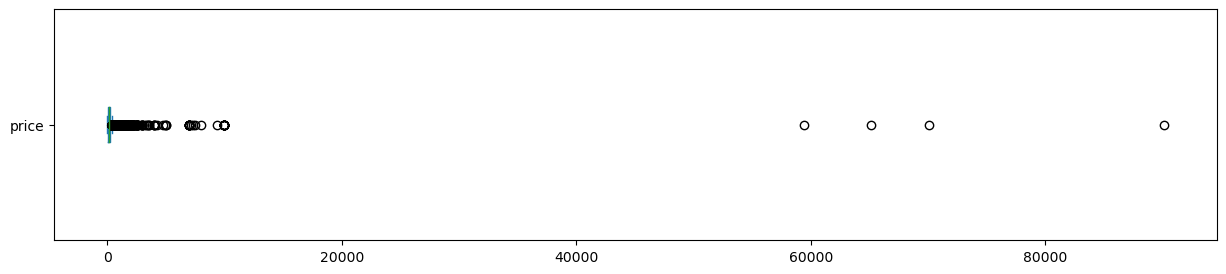

In [144]:
#Box Plot to check for outliers
listings_df['price'].plot(kind='box', vert=False, figsize=(15,3))
len(listings_df[listings_df["price"] > 500])

In [145]:
#Checking correlation of data types
heatmap_df = listings_df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365", "calculated_host_listings_count"]]

#Explanation provided below for the code below
listings_df = listings_df[listings_df["number_of_reviews"] < 98]
listings_df = listings_df[listings_df["reviews_per_month"] < 2.9]
listings_df = listings_df[listings_df["number_of_reviews_ltm"] < 30 ]
listings_df = listings_df[listings_df["price"] < 1050 ]

The standard deviation of each column is obtained, to filter the values based on the first and second deviation. This is done to avoid any outliers influencing the analysis. In the box plot displayed above, there are values upto 80000(for one night) and a simple count of values taken of listings priced above 500 is shown to be 1291. 1000 outliers out of 33000 values can definitely change the course of the analysis, which we want to be careful of. 

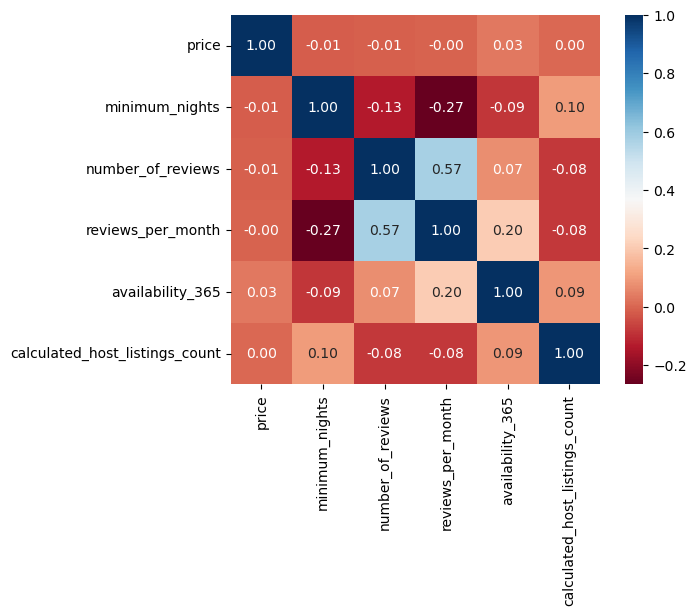

In [146]:
sea.heatmap(heatmap_df.corr(), annot= True, cmap = 'RdBu', fmt = '.2f', square = True);


In [147]:
room_types = listings_df["room_type"].value_counts(sort = True, ascending = False)

<BarContainer object of 4 artists>

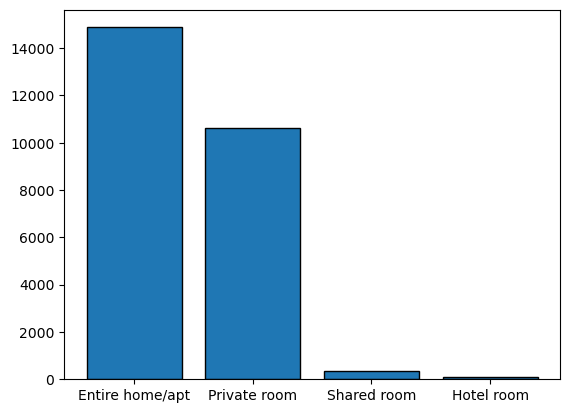

In [148]:
plt.bar(room_types.index, room_types, edgecolor = 'Black')

It is pretty evident from the bar graph that NYC is populated densely with entire houses of private rooms. 

In [149]:
neighbourhood_types = listings_df["neighbourhood_group"].value_counts(sort = True, ascending = False)

<BarContainer object of 5 artists>

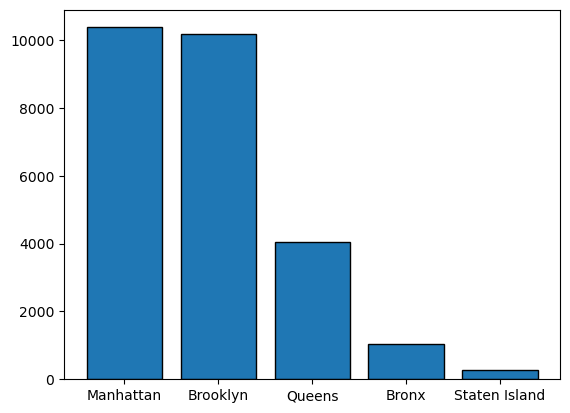

In [150]:
plt.bar(neighbourhood_types.index, neighbourhood_types, edgecolor = 'Black')

As we all know, there are 5 boroughs in New York City. Brooklyn, Manhattan, Queens, Bronx and Staten Island, of which this bar graph very much clearly shows us that Brookly and Manhattan pretty much dominate the NYC Airbnb market. It is understandable since both these boroughs are the most densely popualated and rich neighbourhoods, plus the location at which they are is at the centre of the city.Staten Island has the least, while Bronx has the second least number of units in the city.

In [151]:
average_room_type = round(listings_df.groupby(by = "room_type").price.mean(),2)
average_room_type

room_type
Entire home/apt    219.20
Hotel room         404.15
Private room       105.99
Shared room         80.88
Name: price, dtype: float64

<BarContainer object of 4 artists>

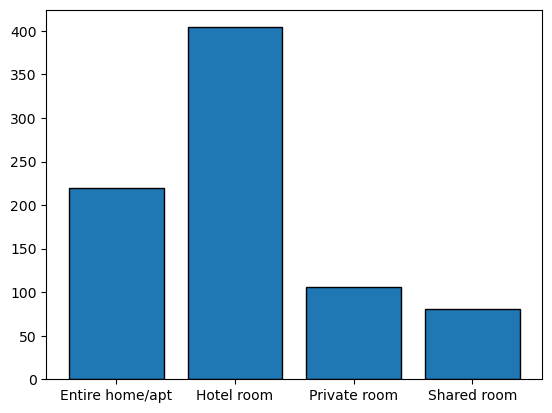

In [152]:
plt.bar(average_room_type.index, average_room_type, edgecolor = 'Black')

It is pretty evident that hotel room listings are higher than other room types in New York Data, while shared rooms are the lowest existing room type.

In [153]:
avg_nights = round(listings_df.groupby(by = "room_type").minimum_nights.mean(),2)
avg_nights

room_type
Entire home/apt    20.44
Hotel room          8.36
Private room       17.74
Shared room        15.12
Name: minimum_nights, dtype: float64

<BarContainer object of 4 artists>

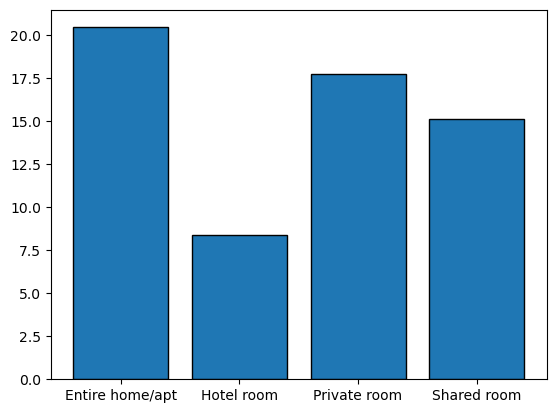

In [154]:
plt.bar(avg_nights.index, avg_nights, edgecolor = "Black")

The above visualized bar graph indicates the average nights that a user stays when he/she books a place of stay in New York City. The highest being for entire homes at 17 nights on average as opposed to hotel rooms which have an average stay time of 7.5 nights. This is because hotels charge a lot more when compared to a private room or a shared room. Guests that visit New York City for a short duration prefer hotel rooms due to the range of services they offer and the convenience of utilizing services offered by the hotels. 

In [155]:
group_price = listings_df.groupby(by="neighbourhood_group").price.mean().sort_values(ascending = False)

<BarContainer object of 5 artists>

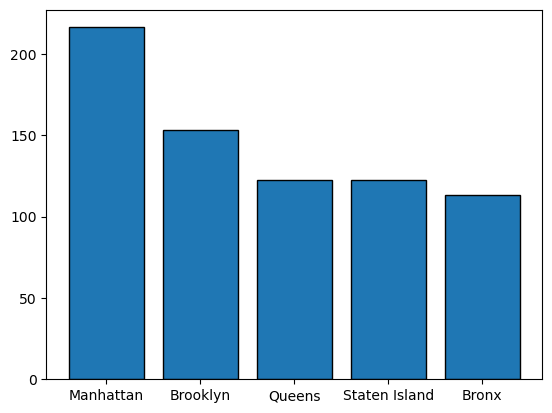

In [156]:
plt.bar(group_price.index, group_price, edgecolor = 'Black')

The average price for a room in Staten Island is higher than that of any other borough and there is an economic reasoning for that. Most listings experience bookings from visiting tourists, who prefer a cheaper stay, especially if it is for a short period(3-4 days). Manhattan usually has visitors who want to visit a lot of places within the city, which is why they prefer a spot within the city, that's in the centre.  

In [157]:
avg_avail = listings_df["neighbourhood_group"].value_counts()
avg_avail = round(avg_avail/len(listings_df) * 100,2)
avg_avail

Manhattan        40.02
Brooklyn         39.23
Queens           15.65
Bronx             4.06
Staten Island     1.04
Name: neighbourhood_group, dtype: float64

<BarContainer object of 5 artists>

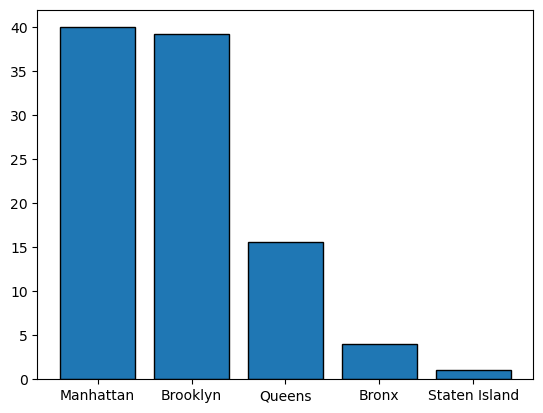

In [158]:
plt.bar(avg_avail.index, avg_avail, edgecolor = 'Black')

Owing to the popularity and demand of the rooms in one of the most populated and famous boroughs, Brooklyn and Manhattan have the most availability of rooms which is about 40 and 38 days on average in a year. Queens, Bronx and Staten Island hve

In [159]:
#Plotting Map using plotly

fig = px.scatter_mapbox(listings_df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="room_type", 
                        hover_data=["neighbourhood", "neighbourhood_group"],
                        color="price",
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [160]:
listings.head(5)

listings_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [161]:
listings_df.dropna(axis = 0, subset = ["host_name", "last_review", "reviews_per_month"], inplace = True)

In [162]:
listings_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [163]:
name_series = []
for item in listings_df["name"]:
    temp = re.search(r'★([\d.]+)', item)
    if temp:
        temp = temp.group(1)
    else:
        temp = 0
    name_series.append(float(temp))


In [164]:
name_series

[4.52,
 4.68,
 4.93,
 5.0,
 4.77,
 4.56,
 4.86,
 5.0,
 4.8,
 4.88,
 4.64,
 0.0,
 5.0,
 4.8,
 5.0,
 4.9,
 4.23,
 4.91,
 4.88,
 0.0,
 4.93,
 4.69,
 4.52,
 4.49,
 4.92,
 5.0,
 4.82,
 4.64,
 4.97,
 4.41,
 4.94,
 4.83,
 4.67,
 4.62,
 4.9,
 4.52,
 4.87,
 4.85,
 4.95,
 4.56,
 4.7,
 4.81,
 4.45,
 4.88,
 4.87,
 4.71,
 3.67,
 4.33,
 5.0,
 4.84,
 4.58,
 5.0,
 4.87,
 4.88,
 4.89,
 4.86,
 4.39,
 4.97,
 4.5,
 4.86,
 4.76,
 4.82,
 4.45,
 4.6,
 4.97,
 4.78,
 4.84,
 4.9,
 4.86,
 4.53,
 4.98,
 4.92,
 4.53,
 4.75,
 4.88,
 4.51,
 4.53,
 4.8,
 4.03,
 4.84,
 5.0,
 4.98,
 4.67,
 4.67,
 4.95,
 4.78,
 4.85,
 4.73,
 4.38,
 4.89,
 4.42,
 4.42,
 5.0,
 4.7,
 4.94,
 4.44,
 4.86,
 4.7,
 0.0,
 4.54,
 4.42,
 4.67,
 4.76,
 4.91,
 4.87,
 4.92,
 4.88,
 4.98,
 4.34,
 4.0,
 4.27,
 4.71,
 4.47,
 4.54,
 4.35,
 5.0,
 4.83,
 4.72,
 4.81,
 4.74,
 5.0,
 5.0,
 4.79,
 4.89,
 4.9,
 4.6,
 4.72,
 4.17,
 4.67,
 4.93,
 4.9,
 0.0,
 4.76,
 4.61,
 4.57,
 4.68,
 5.0,
 4.95,
 0.0,
 4.87,
 4.94,
 4.75,
 4.96,
 5.0,
 4.67,
 4.98,
 0.0,
 0.0,


In [165]:
print("The total number of Records in listings is", len(listings_df))
print("the total number of records in ratings series list is", len(name_series))

The total number of Records in listings is 25942
the total number of records in ratings series list is 25942


In [166]:
listings_df["rating"] = name_series

In [167]:
#updated df with ratings
listings_df.head(5)

id                                               name  host_id  \
0   5121  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356   
1   2595  Rental unit in New York · ★4.68 · Studio · 1 b...     2845   
2  14991  Rental unit in New York · ★4.93 · 1 bedroom · ...    59023   
3   5136  Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...     7378   
4  59709  Rental unit in New York · ★4.77 · 2 bedrooms ·...   186084   

          host_name neighbourhood_group       neighbourhood  latitude  \
0             Garon            Brooklyn  Bedford-Stuyvesant  40.68535   
1          Jennifer           Manhattan             Midtown  40.75356   
2            Bianca           Manhattan     Lower East Side  40.72207   
3           Rebecca            Brooklyn         Sunset Park  40.66265   
4  Ricardo & Ashlie           Manhattan           Chinatown  40.71780   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.95512     Private room     60              30                 50   
1  -73.98559  Entire home/apt    240              30                 49   
2  -73.98976     Private room    120               5                 22   
3  -73.99454  Entire home/apt    276              21                  3   
4  -73.99320  Entire home/apt    325               7                 69   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2019-12-02               0.29                               2   
1  2022-06-21               0.30                               3   
2  2023-05-14               0.14                               1   
3  2022-08-10               0.03                               1   
4  2023-04-28               0.47                               1   

   availability_365  number_of_reviews_ltm  rating  
0                 0                      0    4.52  
1               325                      1    4.68  
2               268                      3    4.93  
3               275                      1    5.00  
4                38                     23    4.77

In [168]:
avg_rating = round(listings_df.groupby(by = "neighbourhood_group").rating.mean().sort_values(ascending = False),2)

<BarContainer object of 5 artists>

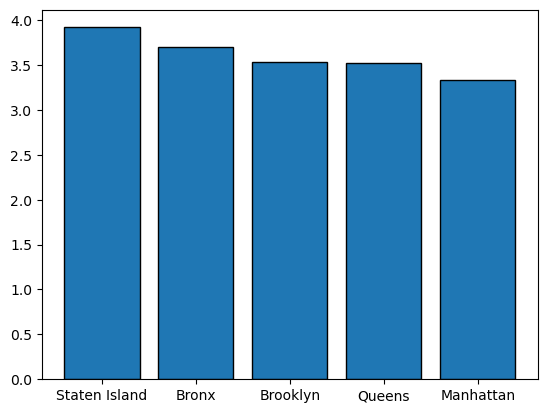

In [169]:
plt.bar(avg_rating.index, avg_rating, edgecolor = 'Black')

This may come as a surprise, but this analysis is due to the fact that number of listings in Staten Island are very low. While Staten Island are highly rated, their listings are a measly <500 while both Manhattan and Brooklyn boast a staggering >2000 in number. This is the reason behind the rating anomaly, that we've witnessed here. Having said that, Staten Island still boasts a pretty good rating, since Bronx has slightly higher number of listings than Staten Island, but still possess a lesser rating than any other borough in New York City. 

In [170]:
avg_rating_roomtype = round(listings_df.groupby(by = "room_type").rating.mean().sort_values(ascending = False),2)

<BarContainer object of 4 artists>

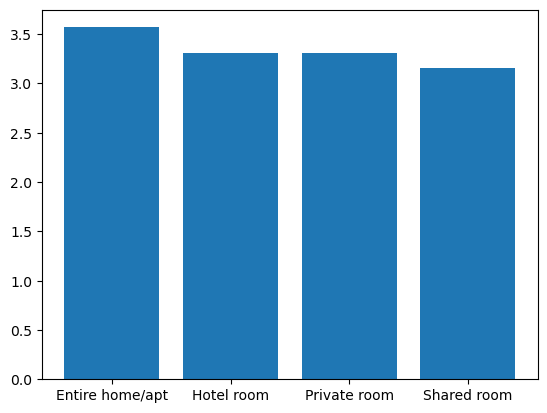

In [171]:
plt.bar(avg_rating_roomtype.index, avg_rating_roomtype)

The ratings of entire homes and private rooms take the first and second spots respectively, while shared rooms are rated lowest, which can be attributed to occupant bias, since the experience that a guest has, is dependent on the other occupant sharing the room as well. 

In [172]:
scatter_data = pd.DataFrame(listings_df[["rating", "price", "neighbourhood_group", "room_type"]])

In [173]:
scatter_data.head(3)
scatter_data = scatter_data[scatter_data["price"] < 1000]
scatter_data = scatter_data[scatter_data["rating"] > 0.0]

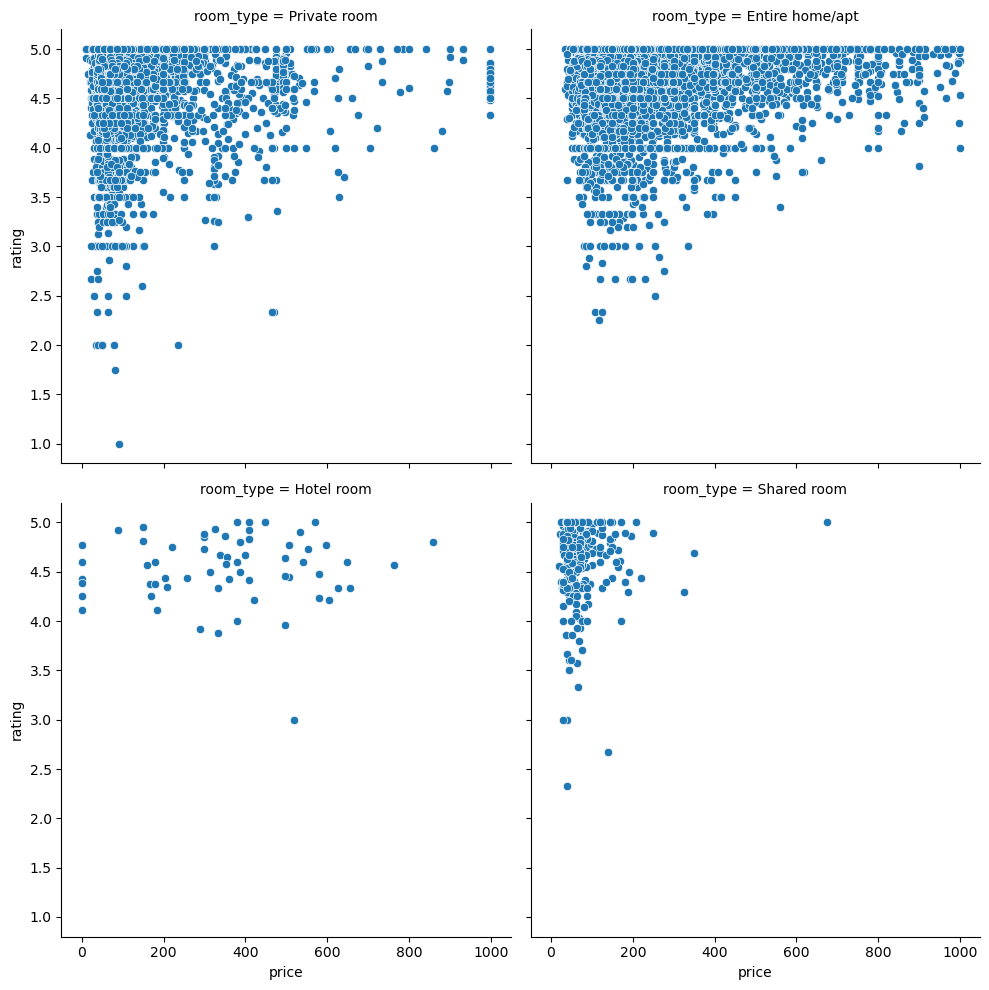

In [174]:
sea.relplot(data = scatter_data, x = "price", y = "rating", col = "room_type", col_wrap = 2)

Individual rating vs price scatter plots analyzing each room types. It is pretty evident that private rooms and entire homes/apts are adundant in New York City. Furthermore, shared rooms have the lowest rated rooms and prices and with fair reason, while the price and ratings of hotel rooms not linear. As noticed previously before, the listings on Bronx and Staten Island are very low when compared to the other 3 boroughs. 

In [175]:
scatter_data = scatter_data[scatter_data["price"] < 1000]
scatter_data = scatter_data[scatter_data["rating"] > 0.0]

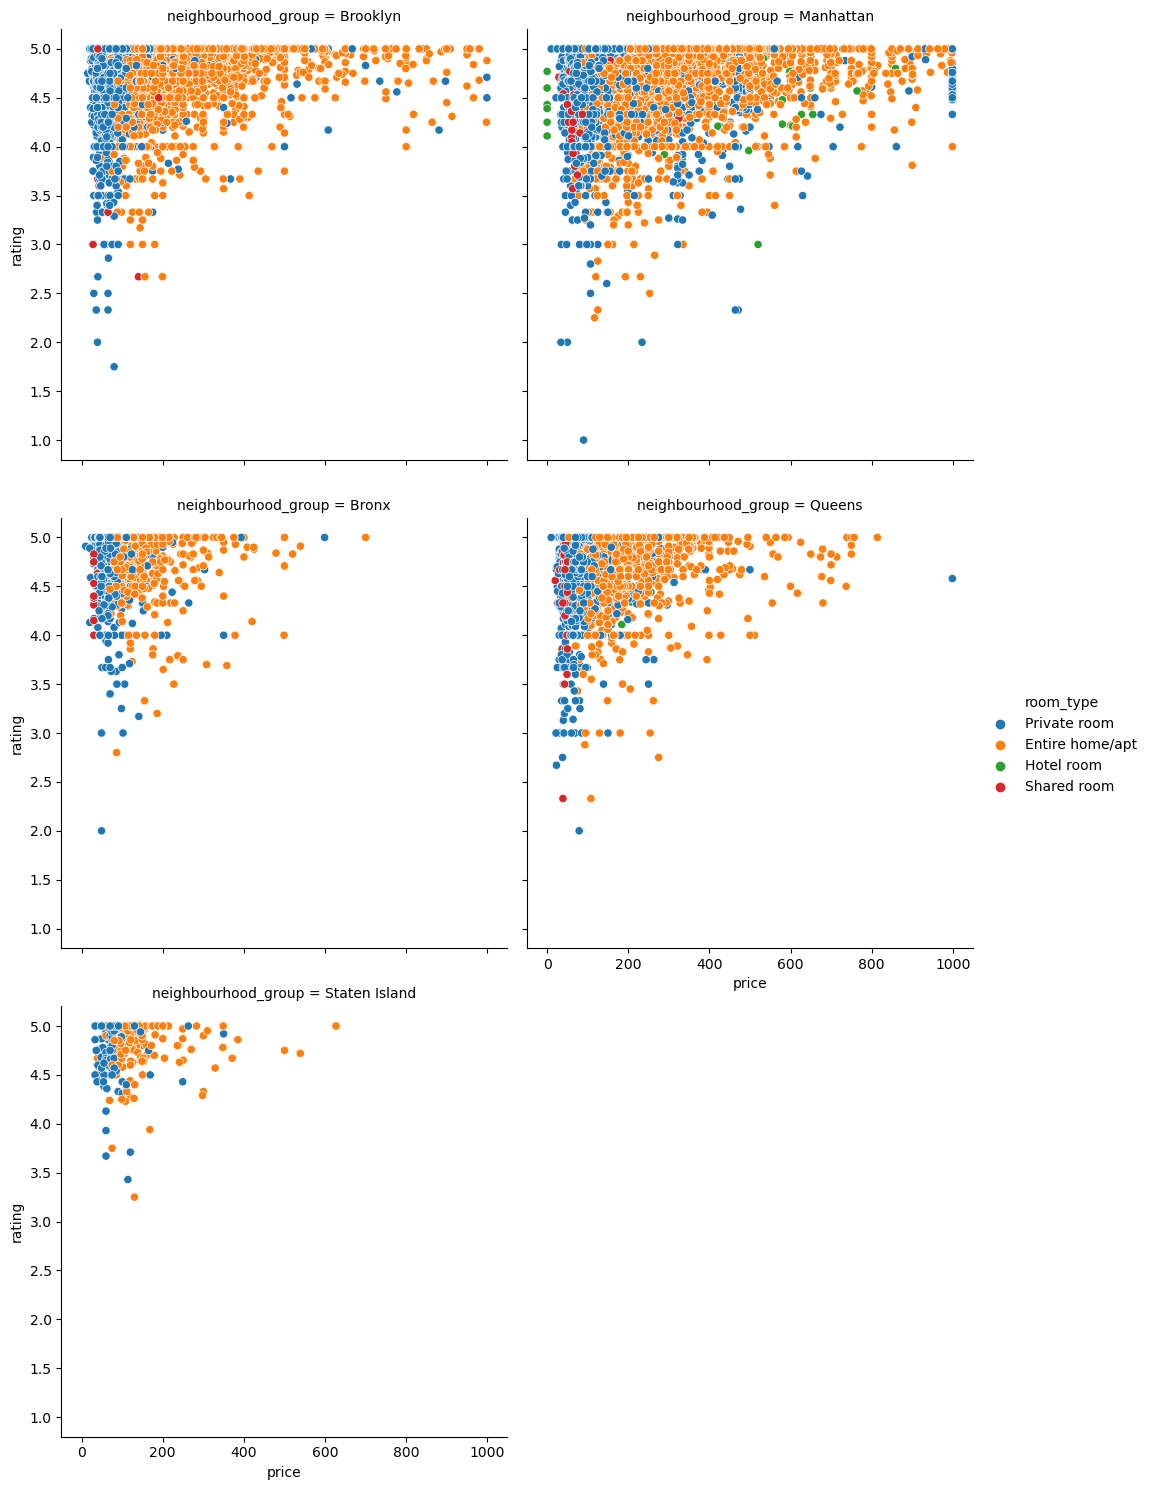

In [176]:
sea.relplot(data = scatter_data, x = "price", y = "rating", col = "neighbourhood_group", col_wrap = 2, hue = "room_type")

These scatter plots analyze the rating vs price relationship for each borough, for each room type in each room borough. It may sound similar to the previous scatter plot, but there is a reason why this graph is complimentary to the previous graph. For each of these boroughs, the clustering starts from the lowest rates offered per room, which are for the private rooms, which are also highly rated. Then the dataset is paraded by entire homes/apartments which take up majority of the postings. Shared rooms and hotel rooms are very scarce, which indicate that private home owners or individual owners are thriving in this Airbnb ecosystem, which makes it a very healthy business model. 

But that is not the purpose of this ipynb file. The purpose was to analyze listings in New York City and find out how rooms are priced, on what basis they are priced and to see what factors affect pricing. 

From analysing the dataset via multiple plots and aggregating measures, it is pretty evident that Manhattan boasts the most expensive rooms as well. While the variety of rooms are limited(they are limited in all the boroughs). But the location of this borough, the places and the time that is saved in travel, all factors in for the high price of the rooms. 

On the other end of the spectrum, we have Staten Island with the least number of listings, with Bronx having the second least. 

